<a href="https://colab.research.google.com/github/Anshikadude/Linear-Regression/blob/main/Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
#!pip install geopy

# Import module
from geopy.geocoders import Nominatim
 
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# Assign Latitude & Longitude
Latitude = "40.765602"
Longitude = "-73.964630"
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
 
# Get location with geocode
location = geolocator.geocode(Latitude+","+Longitude)
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location)



Latitude:  40.765602
Longitude:  -73.964630

Location of the given Latitude and Longitude:
146, East 65th Street, Manhattan Community Board 8, Manhattan, New York County, City of New York, New York, 10065, United States


In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# Feature Creation

In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])


In [11]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()


In [12]:
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

In [13]:
df['pickup_hour']=df['pickup_datetime'].dt.hour 
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month 
df['dropoff_month']=df['dropoff_datetime'].dt.month

Creating a Function of 4 time zones

In [14]:
def time_of_day(x): 
  if x in range(6,12): 
    return 'Morning' 
  elif x in range(12,16): 
    return 'Afternoon' 
  elif x in range(16,22):
     return 'Evening' 
  else:
     return 'Late night'

Applying these function to our dataset

In [15]:
df['pickup_hour'].apply(time_of_day)
df['dropoff_hour'].apply(time_of_day)

0             Evening
1          Late night
2           Afternoon
3             Evening
4           Afternoon
              ...    
1458639     Afternoon
1458640       Morning
1458641       Morning
1458642       Evening
1458643     Afternoon
Name: dropoff_hour, Length: 1458644, dtype: object

# Importing library which calculate distance from geographical coordinates

In [16]:
from geopy.distance import great_circle

Defining fucntion which takes coordinates as input and returns distance

In [17]:
def cal_dist(pick_lat,pick_long,drop_lat,drop_long):
  start_coordinates = (pick_lat,pick_long)
  stop_coordinates = (drop_lat,drop_long)
  return great_circle(start_coordinates,stop_coordinates).km

Applying the function

In [18]:
df['dist'] = df.apply(lambda x:cal_dist(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis =1)

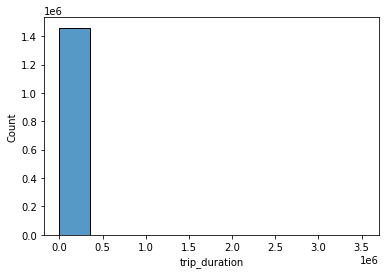

In [19]:
sns.histplot(df['trip_duration'], kde = False , bins = 10)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


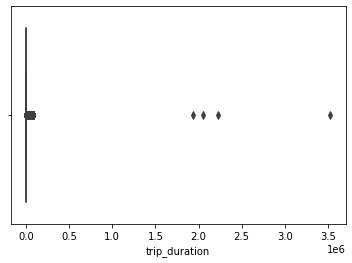

In [20]:

sns.boxplot(df['trip_duration'])

In [21]:
df['trip_duration'].sort_values(ascending = False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [22]:
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)

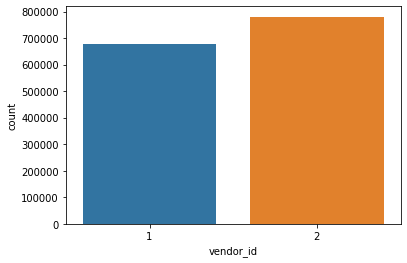

In [23]:
sns.countplot( x = 'vendor_id', data = df)

Passenger Count

In [24]:
df.passenger_count.value_counts()

1    1033539
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

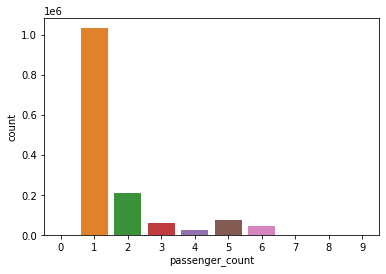

In [25]:
sns.countplot(data = df,x = 'passenger_count')

In [26]:
df = df[df['passenger_count']!= 0] 
df = df[df['passenger_count']<=6]

In [27]:
df['store_and_fwd_flag'].value_counts( normalize = True)
#normalize=True , the object returned will contain the relative frequencies
#of the unique values. The normalize parameter is set to False by default.

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

In [28]:
df['dist'].value_counts()

0.000000    5887
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
3.134769       1
3.231345       1
1.584861       1
0.434274       1
1.134044       1
Name: dist, Length: 1452308, dtype: int64

# Trips per Day

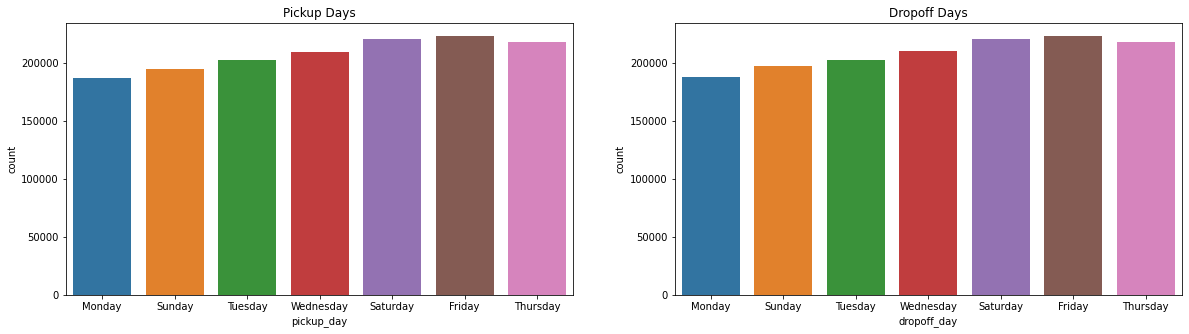

In [29]:
figure,(ax1,ax2) = plt.subplots(ncols = 2, figsize =(20,5))

ax1.set_title('Pickup Days')
ax = sns.countplot(x = 'pickup_day', data =df, ax = ax1)

ax2.set_title('Dropoff Days')
ax = sns.countplot(x = 'dropoff_day', data = df, ax = ax2)

# Trips per Time of Day 

In [30]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'dist'],
      dtype='object')

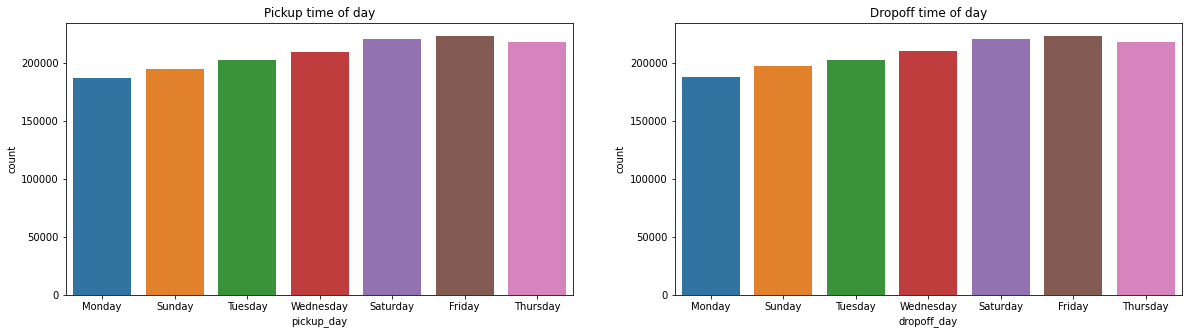

In [31]:
figure,(ax3,ax4) = plt.subplots(ncols =2, figsize = (20,5))

ax3.set_title('Pickup time of day')
ax = sns.countplot(x = 'pickup_day', data =df, ax = ax3)

ax4.set_title('Dropoff time of day')
ax = sns.countplot(x = 'dropoff_day', data =df, ax = ax4)

# Trip duration per month

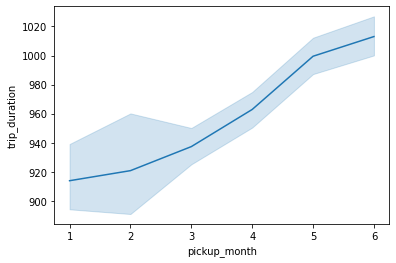

In [32]:
sns.lineplot(x = 'pickup_month' ,y = 'trip_duration', data = df)

# Distance and Vendor

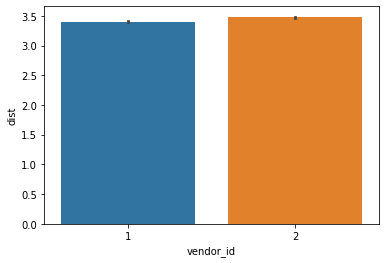

In [34]:
sns.barplot( y = 'dist', x = 'vendor_id', data = df )

# Distance and Store and Forward Flag

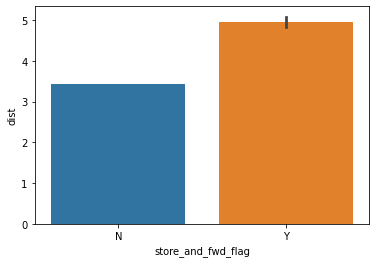

In [39]:
sns.barplot(data = df, y = 'dist', x = 'store_and_fwd_flag')

# Distance per passenger count

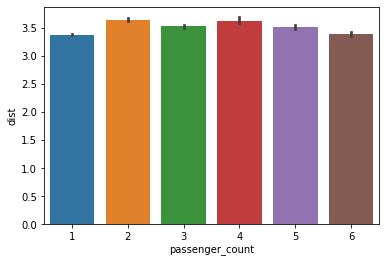

In [38]:
sns.barplot(x = 'passenger_count', y = 'dist', data = df)